In [98]:
ab_results = pd.read_csv("prompt_ablation (1).csv")
ab_results["prompt"] = ab_results["Group"].str.replace(
        "prostnfound_prompt_abl_", ""
    )
ab_results['prompt'].unique()

array(['family_history', '', 'pos', 'age', 'age,pos', 'psa', 'psad',
       'age,psa', 'age,psa,psad,pos', 'age,psa,psad', 'age,psad'],
      dtype=object)

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Assuming you have 'ab_results' with columns: 'prompt', 'improvement', 'new_col_random'
medi_blue = "#2A688E"  # Main color for the first bar
medi_red = "#d96165"
medi_yllw = "#e2ca1a"


def plot_prompt_ablation_results(ax=None):
    ab_results = pd.read_csv("prompt_ablation (1).csv")
    ab_results["prompt"] = ab_results["Group"].str.replace(
        "prostnfound_prompt_abl_", ""
    )
    
    ab_results.rename(columns={"val/core_auc_mean": "hmap", 'val/core_auc_image_level_cspca_mean' : 'cspca'}, inplace=True)

    # ab_results['mean_of_means'] = ab_results.apply(lambda x: (x['hmap'] + x['cspca'])/2 , axis=1)
    # sort the results by the 'mean' column
    ab_results = ab_results.sort_values(by="hmap", ascending=True)
    # add a new column, 'name' which removes the 'prostnfound_prompt_abl' prefix and renames the prompts to '<prompt>' or  '<prompt1>+<prompt2>' e.g. 'age,psa' becomes 'age+psa'
    ab_results["prompt"] = ab_results["Group"].str.replace(
        "prostnfound_prompt_abl_", ""
    )
    ab_results["prompt"] = ab_results["prompt"].str.replace(",", "+")

    # special case: empty string should be 'none'
    ab_results["prompt"] = ab_results["prompt"].replace("", "none")
    ab_results["hmap_gain"] = ab_results["hmap"].apply(
        lambda x: x - 0.717489
    )
    ab_results["hmap"] = ab_results["hmap"].apply(lambda x: x * 100)
    ab_results["prompt"] = ab_results["prompt"].replace(
        {
            "none": "None",
            "age": "Age",
            "psa": "PSA",
            "pos": "Position",
            "psad": "PSAD",
            "psa+psad": "PSA & PSAD",
            "age+pos": "Age & Position",
            "age+psa+psad+pos": "Age, PSA, \n PSAD & Position",
            "age+psa+pos": "Age, PSA & Position",
            "family_history": "Fam. Hist.",
            "age+psa": "Age & PSA",
            "age+psad": "Age & PSAD",
            "age+psa+psad": "Age, PSA & PSAD",
        }
    )  

    ab_results = ab_results[
        ab_results.prompt.isin(["None", "Age", "PSA", "Fam. Hist.", "Age & PSA", "Age, PSA & PSAD"])
    ]
    # ab_results = ab_results[['hmap', 'cspca']]
    # ab_results = pd.melt(
    ##     ab_results, id_vars=['prompt'], value_vars=['hmap', 'cspca'], var_name="score_type", value_name="auroc"
    ## )
    ## ab_results['auroc'] *= 100
    #print(ab_results)
#    print(ab_results.prompt.unique())

    # Plotting the results for improvement exactly as above (excluding the baseline value)
    # color: #medi_blue
    #sns.set(style="whitegrid", font="sans-serif")
    # ab_results = ab_results[ab_results['prompt'] != 'None'].reset_index(drop=True)

    ax = sns.barplot(
        data=ab_results,
        x="prompt",
        y="hmap",
        #hue="score_type",
        linewidth=1.5,
        edgecolor="black",
        color=medi_blue
        ci=None,
        alpha=0.95,
        ax=ax
    )
    ax.set_ylim(60, 85)
    ax.set_ylabel('AUROC (%)')
    ax.set_xlabel('Prompts')
    # plt.errorbar(ab_results['prompt'], ab_results['improvement'], yerr=ab_results['std'], fmt='none', capsize=5, color='black', elinewidth=1.5)

    # plt.plot([x for x in range(len(ab_results['prompt']))], [71.7489] * len(ab_results['prompt']), color='black', linestyle='--', linewidth=1)
    # plt.text(0, 71.8, "Baseline", color="black", fontsize=11, ha="left", va="bottom")

    # plot the improvement (+%) on top of the last bar
    # ab_results["hmap_gain"] = ab_results["hmap"] - 71.7489  # baseline value
    # for i, row in ab_results.iterrows():
    #     if i == 3:
    #         plt.text(
    #             i,
    #             row["hmap"] + 0.3,
    #             f"+{row['hmap_gain']:.1f}%",
    #             ha="center",
    #             va="bottom",
    #             fontsize=12,
    #             color=medi_blue,
    #             fontweight="bold",
    #         )
    # draw a horizontal line at y=0

    #plt.axhline(0, color="black", linestyle="--", linewidth=1)

    #plt.xticks(fontsize=13)
    #plt.yticks(fontsize=13)
    #plt.xlabel("Prompts")  # , fontsize=16, fontweight='bold')
    #plt.ylabel("AUROC (%)")  # , fontsize=16, fontweight='bold')
    # plt.title('Improvement of Prompts over Baseline AUC')
    #plt.ylim(65, 80)


plot_prompt_ablation_results()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3344609662.py, line 77)

In [111]:
pd.melt(ab_results, value_vars=['val/core_auc', 'val/core_auc_image_level_cspca_mean'], id_vars='prompt', var_name='score_type')

,prompt,score_type,value
0,family_history,val/core_auc,0.714910
1,,val/core_auc,0.717489
2,pos,val/core_auc,0.720506
3,age,val/core_auc,0.741911
4,"age,pos",val/core_auc,0.747870
5,psa,val/core_auc,0.750146
6,psad,val/core_auc,0.758731
7,"age,psa",val/core_auc,0.766831
8,"age,psa,psad,pos",val/core_auc,0.774569
9,"age,psa,psad",val/core_auc,0.774824


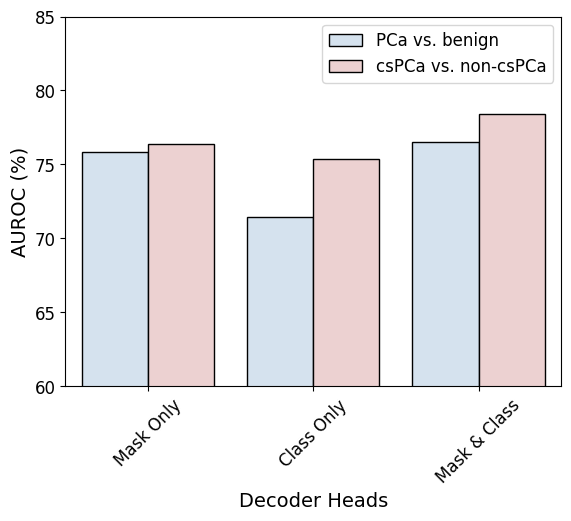

In [141]:
import pandas as pd


def plot_cspca_head_ablation(ax = None, ylabels=True):

    abl_heads = pd.read_csv('cspca_ablation.csv')

    abl_heads

    abl_heads["architecture"] = abl_heads["group"].str.replace('prostnfound_cspca_abl_', '')

    # rename columns manually
    abl_heads["architecture"] = abl_heads["architecture"].replace({
        'nocspca': 'Mask Only',
        'nohmap': 'Class Only',
        '': 'Mask & Class',
    })


    metric_map = {
        'Mask Only': ['val/heatmap_cancer_vs_benign_auc_mean', 'val/core_auc_heatmap_cspca_mean', 'val/heatmap_cancer_vs_benign_auc_std', 'val/core_auc_heatmap_cspca_std'],
        'Class Only': ['val/core_auc_cancer_vs_benign_image_level_mean', 'val/core_auc_cancer_vs_benign_image_level_std', 'val/core_auc_image_level_cspca_mean', 'val/core_auc_image_level_cspca_std'],
        'Mask & Class': ['val/heatmap_cancer_vs_benign_auc_mean', 'val/heatmap_cancer_vs_benign_auc_std', 'val/core_auc_image_level_cspca_mean', 'val/core_auc_image_level_cspca_std']
    }

    cancer_vs_benign = {}
    for arch, metrics in metric_map.items():
        cancer_vs_benign[arch] = {}
        for metric in metrics:
            if "cancer_vs_benign" in metric:
                if "mean" in metric:
                    mean_value = abl_heads[abl_heads.architecture == arch][metric].values[0]
                    cancer_vs_benign[arch]['mean_auc'] = mean_value
                elif "std" in metric:
                    std_value = abl_heads[abl_heads.architecture == arch][metric].values[0]
                    cancer_vs_benign[arch]['std_auc'] = std_value

    cspca = {}
    for arch, metrics in metric_map.items():
        cspca[arch] = {}
        for metric in metrics:
            if "cspca" in metric:
                if "mean" in metric:
                    mean_value = abl_heads[abl_heads.architecture == arch][metric].values[0]
                    cspca[arch]['mean_cspca'] = mean_value
                elif "std" in metric:
                    std_value = abl_heads[abl_heads.architecture == arch][metric].values[0]
                    cspca[arch]['std_cspca'] = std_value


    colors = [medi_blue, medi_red]
    # plot: each architecture's mean_cspca and mean_auc with error bars
    #sns.set(style="whitegrid", font='sans-serif')
    # plt.figure(figsize=(6, 3))

    data = []
    for key in cancer_vs_benign.keys():
        data.append(
            dict(
                AUROC=cancer_vs_benign[key]['mean_auc'], 
                task='PCa vs. benign', 
                method=key
            )
        )
    for key in cspca.keys():
        data.append(
            dict(
                AUROC=cspca[key]['mean_cspca'], 
                task='csPCa vs. non-csPCa', 
                method=key
            )
        )
    data = pd.DataFrame(data)
    data['AUROC'] *= 100

    ax = ax or plt.gca()

    sns.set_palette(
        [medi_blue, medi_red]
    )
    ax = sns.barplot(
        data=data, 
        y='AUROC', 
        x='method', 
        hue='task', 
        ec='black', 
        ax=ax
    )
    ax.legend(
        title=False, 
        fontsize=12,
        
    )
    ax.set_ylim(60, 85)
    ax.set_xlabel('Decoder Heads')
    ax.tick_params(axis='x', rotation=45)

    if not ylabels: 
        #ax.set_yticks([])
        ax.set_ylabel(None)
        ax.tick_params(axis='y', labelleft=False)
    else: 
        ax.set_ylabel("AUROC (%)")


plot_cspca_head_ablation()

In [144]:
from medAI.datasets.optimum.utils import get_cleaned_ua_metadata_table
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import json


ai_model_outputs = pd.read_csv('metrics_by_core.csv', index_col=0)
columns = ['average_needle_heatmap_value', 'image_level_cancer_logits', 'involvement']
ai_model_outputs = ai_model_outputs.set_index('core_id')[columns]
# Assuming you have 'ab_results' with columns: 'prompt', 'improvement', 'new_col_random'
medi_blue = "#2A688E"  # Main color for the first bar
medi_red = "#d96165"
medi_yllw = "#e2ca1a"
medi_blue = "#D1E2F2"
medi_deep_blue = "#6c8ebf"
medi_red = "#F1CDCC"
medi_deep_red = "#b85450"
medi_yllw = "#fef2cc"
medi_deep_yllw = "#d6b656"
medi_green = "#DAEAD4"
medi_deep_green = "#82b365"
model_score = 'image_level_cancer_logits'
minimum_grade_group = 2



def get_table_with_ai_outputs(*args, **kwargs):
    table = get_cleaned_ua_metadata_table(*args, **kwargs)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table['image_level_cancer_logits'].isna()]

    import numpy as np

    model_cspca_score = table['image_level_cancer_logits']
    counts = table['PRI-MUS'].value_counts(normalize=True)

    bins = [0]
    cum = 0
    for i in range(1, 6):
        prob = counts.at[i]
        cum += prob
        bins.append(np.quantile(model_cspca_score, cum))

    table['binned_model_cspca_score'] = pd.cut(model_cspca_score, bins=bins, labels=range(1, 6))
    #pd.cut(model_cspca_score, bins=bins).value_counts(normalize=True)

    return table
    

def get_metrics_model_vs_expert(model_score, minimum_grade_group, ai_model_outputs, pct_cancer_threshold=None):

    metrics = {}

    from sklearn.metrics import roc_auc_score

    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_pct_cancer_threshold=pct_cancer_threshold)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table[model_score].isna()]

    metrics['systematic_and_targeted_samples'] = dict(
        model_cspca_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['image_level_cancer_logits']), 
        model_heatmap_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['average_needle_heatmap_value']),
        pri_mus_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['PRI-MUS'])
    )

    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_has_pirads=True, filter_pct_cancer_threshold=pct_cancer_threshold)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table[model_score].isna()]

    metrics['pi_rads_targeted_samples'] = dict(
        model_cspca_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['image_level_cancer_logits']), 
        model_heatmap_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['average_needle_heatmap_value']),
        pri_mus_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['PRI-MUS']),
        pi_rads=roc_auc_score(table['grade_group'] > minimum_grade_group, table['PI-RADS']),
    )

    return metrics


def create_inv_vs_auroc_plot(ax=None):
    thresholds = []
    model_aurocs = []
    pri_mus_aurocs = []

    for threshold in range(0, 80, 10):
        metrics = get_metrics_model_vs_expert('image_level_cancer_logits', 2, ai_model_outputs, pct_cancer_threshold=threshold)
        model_aurocs.append(metrics['systematic_and_targeted_samples']['model_cspca_score_auc'] * 100)
        pri_mus_aurocs.append(metrics['systematic_and_targeted_samples']['pri_mus_auc'] * 100)
        thresholds.append(threshold)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    plt.figure(figsize=(5, 3))

    ax.plot(thresholds, model_aurocs, label='ProstNFound+', marker='o', linewidth=2, color=medi_deep_blue)
    ax.plot(thresholds, pri_mus_aurocs, label='PRI-MUS', marker='^', linewidth=2, color=medi_deep_red)
    ax.set_xlabel('Involvement Threshold (%)')
    ax.set_ylabel('AUROC (%)')
    ax.legend(fontsize=12)
    
    # plt.tight_layout()
    # plt.savefig('model_vs_primus_inv.pdf', dpi=333)


def create_inv_vs_heatmap_plot(ax=None):
    table = get_table_with_ai_outputs(
    )

    human_scores = table['PRI-MUS']
    model_scores = table['average_needle_heatmap_value']
    involvement_bin = pd.cut(
        table['pct_cancer'], bins=np.arange(0, 100, 10), labels=["<10", "10-20", "20-30", "30-40", "40-50", "50-60", "70-80", "80-90", ">90"]
    )

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    # sns.lineplot(
    #     x=involvement_bin, y=model_scores, color=medi_deep_blue, linewidth=2, marker='^', markersize=10, err_style="bars", ax=ax
    # )
    sns.barplot(
        x=involvement_bin, y=model_scores, ax=ax, color=medi_deep_blue, ec='black'
    )
    # sns.swarmplot(
    #     x=involvement_bin, y=model_scores, ax=ax, alpha=0.5
    # )
    # sns.lineplot(
    #     x=involvement_bin, y=model_scores, ax=ax, c=medi_deep_blue, ci=None
    # )
    ax.set_xticks([0, 2, 4, 6, 8])
    ax.set_xticks([1, 3, 5, 7, 9], minor=True)
    

    ax.set_xlabel("Percent Cancer in Sample (%)")
    ax.set_ylabel("Avg. activation in needle")
    #sns.stripplot(x=involvement_bin, y=model_scores, color='black', jitter=True, alpha=0.3)




/tmp/ipykernel_81202/4019669803.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_81202/3980853948.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


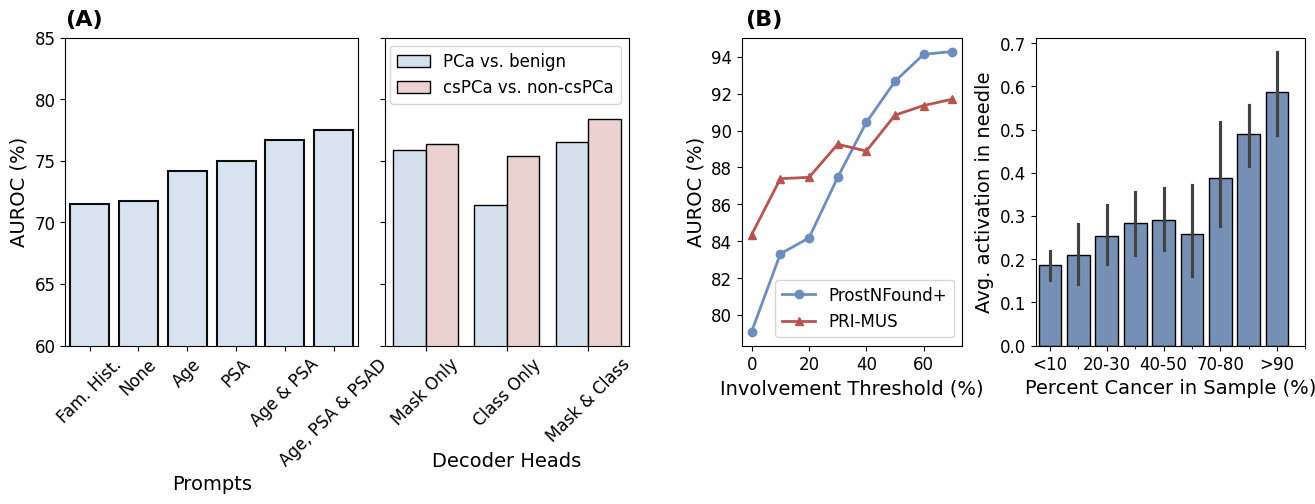

<Figure size 500x300 with 0 Axes>

In [173]:
import matplotlib as mpl 
params = mpl.rcParams
params['font.size'] = 14
params['xtick.labelsize'] = 12 
params['ytick.labelsize'] = 12

fig = plt.figure(figsize=(16, 4))
outer = fig.add_gridspec(
    nrows=1, ncols=2,
    width_ratios=[2, 2],   # left block takes 3× the width of right block
    wspace=0.2            # slim gap between the two blocks
)
# ── Left block: 3 checkerboards, tightly packed ──────────────────────────
gs_left = outer[0].subgridspec(1, 2, wspace=0.1, width_ratios=[1.2, 1])
ax_left = gs_left.subplots()                 # returns a (1,3) array of axes

# ── Right block: 2 stacked−bar charts, right next to each other ─────────
gs_right = outer[1].subgridspec(1, 2, wspace=0.3, width_ratios=[1, 1.22])
ax_right = gs_right.subplots()

plot_prompt_ablation_results(ax_left[0])
plot_cspca_head_ablation(ax_left[1], ylabels=False)
create_inv_vs_auroc_plot(ax_right[0])
create_inv_vs_heatmap_plot(ax_right[1])
fig.tight_layout()
fig.text(0.125, .91, '(A)', fontdict=dict(size=16, fontweight='bold'))
fig.text(0.55, .91, '(B)', fontdict=dict(size=16, fontweight='bold'))

ax_left[0].tick_params('x', rotation=45)
# fig.subplots_adjust(left=0.07, right=0.97, top=0.95, bottom=0.07)
# fig.tight_layout(pad=10)  
fig.savefig('combined_ablation_inv_fig', bbox_inches='tight', format='pdf')
